# **Lab 6: Random Forest & ExtraTrees**


## Exercise 1: Binary Classification with Random Forest

We are going to use a modified version of the dataset from UCI Machine Learning Repository which contains the income census data for 30718 americans (https://archive.ics.uci.edu/ml/datasets/Adult).

The columns are:
1.   AGE: age of the person.
2.   WORKCLASS: class of work.
3.   EDUCATION_NUM: numeric education level.
4.   MARITAL_STATUS: marital status  of the person.
5.   OCCUPATION: occupation  of the person.
6.   RELATIONSHIP: type of relationship.
7.   SEX: sex of the person.
8.   HOURS_PER_WEEK: average number of hour working per week.
9.   INCOME: income level (<=50K or >50K).

We will be loading the data here:
https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab06/ex1/adult_income.csv

We want to predict whether an individual will earn more or less than $50,000 per year (**"income"**). This is a binary classification problem.

The steps are:
1.   Load and explore dataset
2.   Prepare Data
3.   Split Data
4.   Assess Baseline Model
5.   Train Initial RandomForest with Default Hyperparameter
6.   Reduce Overfitting with n_estimators
7.   Reduce Overfitting with max_depth
8.   Reduce Overfitting with min_samples_leaf
9.   Reduce Overfitting with max_features
10.  Features Importance

---
### 0. Setup Environment

In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

lab = LabExFolder(
  course_code="36106",
  lab="lab06",
  exercise="ex01"
)
lab.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00
Mounted at /content/gdrive

You can now save your data files in: /content/36106/labs/lab06/ex01/data


In [2]:
import warnings
warnings.simplefilter(action='ignore')

### 1. Load and Explore Dataset

**[1.1]** Import the pandas and numpy package

In [3]:
# Placeholder for student's code

In [4]:
# Solution
import pandas as pd
import numpy as np

**[1.2]** Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called `df`

In [5]:
# Placeholder for student's code

In [6]:
# Solution
file_url = 'https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab06/ex1/adult_income.csv'
df = pd.read_csv(file_url)

**[1.3]** Display the first 5 rows of `df`

In [7]:
# Placeholder for student's code

In [8]:
# Solution
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,sex,hours_per_week,income
0,39,State_gov,13,Never_married,Adm_clerical,Not_in_family,Male,40,<=50K
1,50,Self_emp_not_inc,13,Married_civ_spouse,Exec_managerial,Husband,Male,13,<=50K
2,38,Private,9,Divorced,Handlers_cleaners,Not_in_family,Male,40,<=50K
3,53,Private,7,Married_civ_spouse,Handlers_cleaners,Husband,Male,40,<=50K
4,28,Private,13,Married_civ_spouse,Prof_specialty,Wife,Female,40,<=50K


**[1.4]** Display the dimensions (shape) of `df`

In [9]:
# Placeholder for student's code

In [10]:
# Solution
df.shape

(30718, 9)

**[1.5]** Display the summary (info) of `df`

In [11]:
# Placeholder for student's code

In [12]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30718 entries, 0 to 30717
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30718 non-null  int64 
 1   workclass       30718 non-null  object
 2   education_num   30718 non-null  int64 
 3   marital_status  30718 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    30718 non-null  object
 6   sex             30718 non-null  object
 7   hours_per_week  30718 non-null  int64 
 8   income          30718 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.1+ MB


**[1.6]** Display the descriptive statictics of `df`


In [13]:
# Placeholder for student's code

In [14]:
# Solution
df.describe()

,age,education_num,hours_per_week
count,30718.000000,30718.000000,30718.000000
mean,38.443584,10.130314,40.949313
std,13.118227,2.562469,11.985382
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


### 2. Prepare Data

**[2.1]** Create a copy of `df` and save it into a variable called `df_cleaned`


In [15]:
# Placeholder for student's code

In [16]:
# Solution
df_cleaned = df.copy()

**[2.3]** Create a variable called `cat_cols` containing the following items: `workclass`,`marital_status`,`occupation`,`relationship`,`sex`

In [17]:
# Placeholder for student's code

In [18]:
# Solution
cat_cols = ['workclass','marital_status','occupation','relationship','sex']

**[2.4]** One hot encode the categorical columns by using the "get_dummies" function from pandas

In [19]:
# Placeholder for student's code

In [20]:
# Solution
df_cleaned = pd.get_dummies(df_cleaned, columns=cat_cols)

**[2.5]** Display the first 5 rows of `df_cleaned`

In [21]:
# Placeholder for student's code

In [22]:
# Solution
df_cleaned.head()

,age,education_num,hours_per_week,income,workclass_Federal_gov,workclass_Local_gov,workclass_Private,workclass_Self_emp_inc,workclass_Self_emp_not_inc,workclass_State_gov,...,occupation_Tech_support,occupation_Transport_moving,relationship_Husband,relationship_Not_in_family,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
0,39,13,40,<=50K,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1,50,13,13,<=50K,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,38,9,40,<=50K,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,53,7,40,<=50K,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,28,13,40,<=50K,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [23]:
df_cleaned.shape

(30718, 40)

**[2.6]**  Split the target `X` and the features `Y`

In [24]:
# Placeholder for student's code

In [25]:
# Solution
y = df_cleaned.pop('income')
X = df_cleaned

## 3. Split Data

Note: If you are stuck in previous steps, you can dowload the content of X here: 'https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab06/ex1/df_cleaned.csv'

**[3.1]** Print the frequencies of each value of the target
variable

In [26]:
# Placeholder for student's code

In [27]:
# Solution
y.value_counts(normalize=True)

,proportion
income,
<=50K,0.75096
>50K,0.24904



**[3.2]** Import train_test_split from sklearn.model_selection

In [28]:
# Placeholder for student's code

In [29]:
# Solution
from sklearn.model_selection import train_test_split

**[3.3]** Split randomly the dataset with random_state=8 into 2 different sets: data (80%) and test (20%)

In [30]:
# Placeholder for student's code

In [31]:
# Solution
X_data, X_test, y_data, y_test = train_test_split (X, y, test_size=0.2, random_state=8)

**[3.4]** Print the frequencies of each value of the testing target

In [32]:
# Placeholder for student's code

In [33]:
# Solution
y_test.value_counts(normalize=True)

,proportion
income,
<=50K,0.75944
>50K,0.24056


**[3.5]** Split the data randomly with random_state=8 into 2 different sets: training (80%) and validation (20%)

In [34]:
# Placeholder for student's code

In [35]:
# Solution
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

## 4. Assess Baseline Model

Note: If you are stuck in previous steps, you can dowload the content of the split sets here: https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab06/ex1

**[4.1]** Import the DummyClassifier module from sklearn

In [36]:
# Placeholder for student's code

In [37]:
# Solution
from sklearn.dummy import DummyClassifier

**[4.2]** Instantiate the Dummy class into a variable called `base_clf` and fit it on the training set it

In [38]:
# Placeholder for student's code

In [39]:
# Solution
base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

**[4.3]** Import the accuracy score from sklearn

In [40]:
# Placeholder for student's code

In [41]:
# Solution
from sklearn.metrics import accuracy_score

**[4.4]** Display the accuracy score of this baseline model on the training set

In [42]:
# Placeholder for student's code

In [43]:
# Solution
y_preds = base_clf.predict(X_train)
accuracy_score(y_train, y_preds)

0.7476473879647998

## 5. Train Initial RandomForest with Default Hyperparameter

**[5.1]** Import the RandomForestClassifier from sklearn.ensemble

In [44]:
# Placeholder for student's code

In [45]:
# Solution
from sklearn.ensemble import RandomForestClassifier

**[5.2]** Instantiate the RandomForestClassifier class called rf1 with a random state=8

In [46]:
# Placeholder for student's code

In [47]:
# Solution
rf1 = RandomForestClassifier(random_state=8)

**[5.3]** Fit the RandomForest model

In [48]:
# Placeholder for student's code

In [49]:
# Solution
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

**[5.4]** Calculate the accuracy of the RandomForest on the training and validation sets and print them

In [50]:
# Placeholder for student's code

In [51]:
# Solution
print(rf1.score(X_train, y_train))
print(rf1.score(X_val, y_val))

0.9650541736609186
0.8177009155645981


## 6. Reduce Overfitting with n_estimators

**[6.1]** Train a RandomForestClassifier model with n_estimators=50 and print the accuracy score for the training and validation sets

In [52]:
# Placeholder for student's code

In [53]:
# Solution
rf2 = RandomForestClassifier(random_state=8, n_estimators=50).fit(X_train, y_train)
print(rf2.score(X_train, y_train))
print(rf2.score(X_val, y_val))

0.9644437662139478
0.8179043743641913


**[6.2]** Train a RandomForestClassifier model with n_estimators=200 and print the accuracy score for the training and validation sets

In [54]:
# Placeholder for student's code

In [55]:
# Solution
rf2 = RandomForestClassifier(random_state=8, n_estimators=200).fit(X_train, y_train)
print(rf2.score(X_train, y_train))
print(rf2.score(X_val, y_val))

0.9650541736609186
0.8191251271617498


## 7. Reduce Overfitting with max_depth

**[7.1]** Print the average "**max_depth**" for rf2:

In [56]:
np.mean([estimator.tree_.max_depth for estimator in rf2.estimators_])

np.float64(37.395)

**[7.2]** Train a RandomForestClassifier model with n_estimators=50, max_depth=10 and print the accuracy score for the training and validation sets

In [57]:
# Placeholder for student's code

In [58]:
# Solution
rf3 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=10).fit(X_train, y_train)
print(rf3.score(X_train, y_train))
print(rf3.score(X_val, y_val))

0.846533394374078
0.8349949135300102


**[7.3]** Train a RandomForestClassifier model with n_estimators=50, max_depth=20 and print the accuracy score for the training and validation sets

In [59]:
# Placeholder for student's code

In [60]:
# Solution
rf4 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=20).fit(X_train, y_train)
print(rf4.score(X_train, y_train))
print(rf4.score(X_val, y_val))

0.9393153263136477
0.834791454730417


**[7.4]** xTrain a RandomForestClassifier model with n_estimators=50, max_depth=15 and print the accuracy score for the training and validation sets

In [61]:
# Placeholder for student's code

In [62]:
# Solution
rf5 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15).fit(X_train, y_train)
print(rf5.score(X_train, y_train))
print(rf5.score(X_val, y_val))

0.8917035454499211
0.8368260427263479


## 8.   Reduce Overfitting with min_samples_leaf

**[8.1]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2 and print the accuracy score for the training and validation sets

In [63]:
# Placeholder for student's code

In [64]:
# Solution
rf6 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2).fit(X_train, y_train)
print(rf6.score(X_train, y_train))
print(rf6.score(X_val, y_val))

0.8656086270919172
0.8439471007121058


**[8.2]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=10 and print the accuracy score for the training and validation sets

In [65]:
# Placeholder for student's code

In [66]:
# Solution
rf7 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=10).fit(X_train, y_train)
print(rf7.score(X_train, y_train))
print(rf7.score(X_val, y_val))

0.8395645760211607
0.8364191251271618


**[8.3]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=5 and print the accuracy score for the training and validation sets

In [67]:
# Placeholder for student's code

In [68]:
# Solution
rf8 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=5).fit(X_train, y_train)
print(rf8.score(X_train, y_train))
print(rf8.score(X_val, y_val))

0.8487715550129712
0.8404883011190234


## 9.   Reduce Overfitting with max_features

**[9.1]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=2 and print the accuracy score for the training and validation sets

In [69]:
# Placeholder for student's code

In [70]:
# Solution
rf9 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=2).fit(X_train, y_train)
print(rf9.score(X_train, y_train))
print(rf9.score(X_val, y_val))

0.8492293605981993
0.8329603255340794


**[9.2]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=5 and print the accuracy score for the training and validation sets

In [71]:
# Placeholder for student's code

In [72]:
# Solution
rf10 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=5).fit(X_train, y_train)
print(rf10.score(X_train, y_train))
print(rf10.score(X_val, y_val))

0.8608271020906455
0.8366225839267548


**[9.3]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=None and print the accuracy score for the training and validation sets

In [73]:
# Placeholder for student's code

In [74]:
# Solution
rf11 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=None).fit(X_train, y_train)
print(rf11.score(X_train, y_train))
print(rf11.score(X_val, y_val))

0.8945521135357851
0.8362156663275687


**[9.4]** Print the accuracy score of the best model on the testing set

In [75]:
# Placeholder for student's code

In [76]:
# Solution
print(rf7.score(X_test, y_test))

0.84130859375


**[9.5]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [77]:
# Placeholder for student's code

In [78]:
# Solution
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[9.6]** Task: Plot the confusion matrics for the training, validation and testing sets

In [79]:
# Placeholder for student's code

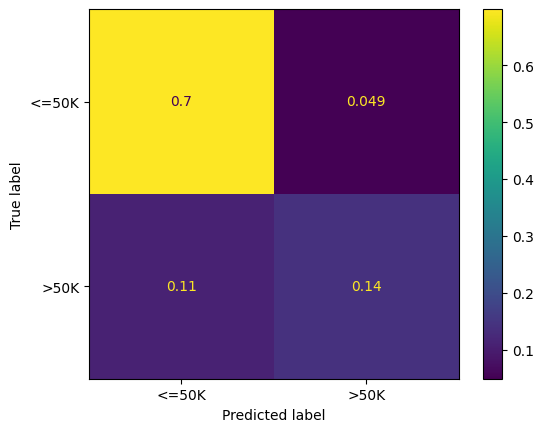

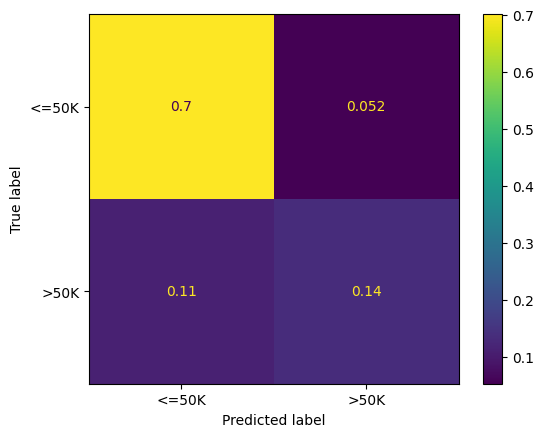

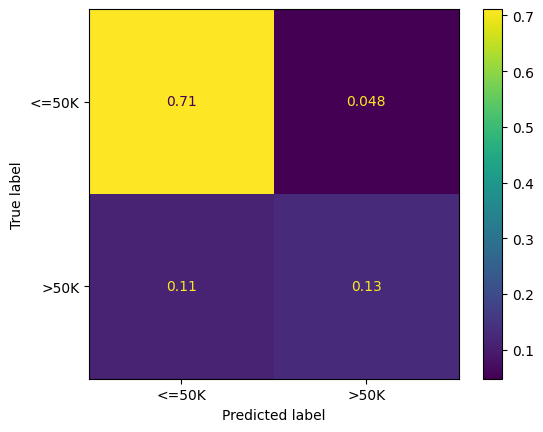

In [80]:
# Solution
ConfusionMatrixDisplay.from_estimator(rf7, X_train, y_train, normalize='all')
ConfusionMatrixDisplay.from_estimator(rf7, X_val, y_val, normalize='all')
ConfusionMatrixDisplay.from_estimator(rf7, X_test, y_test, normalize='all')

## 10.  Features Importance


**[10.1]** Task: Print the features importance of rf7

In [81]:
# Placeholder for student's code

In [82]:
# Solution
rf7.feature_importances_

array([1.07684813e-01, 1.81421477e-01, 6.34910891e-02, 2.49831265e-03,
       2.11712046e-03, 8.24463088e-03, 8.13653069e-03, 7.46001010e-03,
       1.29350603e-03, 0.00000000e+00, 1.53779911e-02, 0.00000000e+00,
       1.80617957e-01, 4.77953795e-04, 7.43455457e-02, 1.93173144e-03,
       6.98456837e-04, 3.24263933e-03, 0.00000000e+00, 5.06467067e-03,
       4.38021107e-02, 6.57313731e-03, 3.56025977e-03, 6.79344635e-03,
       1.77391920e-02, 3.31284068e-06, 3.40253416e-02, 1.54121194e-03,
       4.87070944e-03, 3.36587492e-03, 4.99700548e-03, 1.06022026e-01,
       2.04752344e-02, 7.08691427e-04, 1.72039642e-02, 7.98189006e-03,
       2.35509572e-02, 1.55371582e-02, 1.71440396e-02])

**[10.2]** Create a Dataframe with these values

In [83]:
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X_train.columns,
        'feature_importance': rf7.feature_importances_
     }
)

**[10.3]** Sort the previous dataframe and reset its index

In [84]:
# Placeholder for student's code

In [85]:
# Solution
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

**[10.4]** Display the first 10 rows of this dataframe

In [86]:
# Placeholder for student's code

In [87]:
# Solution
feat_imp_rf_df.head(10)

,feature,feature_importance
0,education_num,0.181421
1,marital_status_Married_civ_spouse,0.180618
2,age,0.107685
3,relationship_Husband,0.106022
4,marital_status_Never_married,0.074346
5,hours_per_week,0.063491
6,occupation_Exec_managerial,0.043802
7,occupation_Prof_specialty,0.034025
8,relationship_Wife,0.023551
9,relationship_Not_in_family,0.020475


**[10.5]** We can visualise this information on a graph

In [88]:
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)